# 0.0 Decision Tree theory

![Terminology](Terminology.png)
![Gini](Gini.PNG)
  
**Gini impurity** is a measure of how often a randomly choosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.  

Example:  
Suppose you have a dataset of 10 samples:  
- Class A: 7 samples  
- Class B: 3 samples  

So the probabilities are:
$p_A = \frac{7}{10}$
$p_B = \frac{3}{10}$

So the Gini impurity is calculated as: $$G=1-\sum_{i=1}^{n} p_i^2$$ it is the same formula as $$\sum_{i=1}^{n} p_i(1-p_i)$$  

so for our case:  

$G = 1 - (0.7^2 + 0.3^2) = 0.42$

We are using Gini impurity for calculateing information gain, so first of all we are calculating impurity in the root node, then sub-nodes, and then we are able to compute information gain
![Gain](Gain.PNG)
Gain is calculated as impurity of the parent group - weighted average impurity of the child group

When we will calculated information gain of another rule of splitting we are able to choose which one is better (better = higher)
![Compare](Compare.PNG)
  
Another example:  
![Example](Example.PNG)


When we are using pruning and early stop condition?  
When we want to prevent a large numer of splits and overfitting

# 1.0 Generating datasets

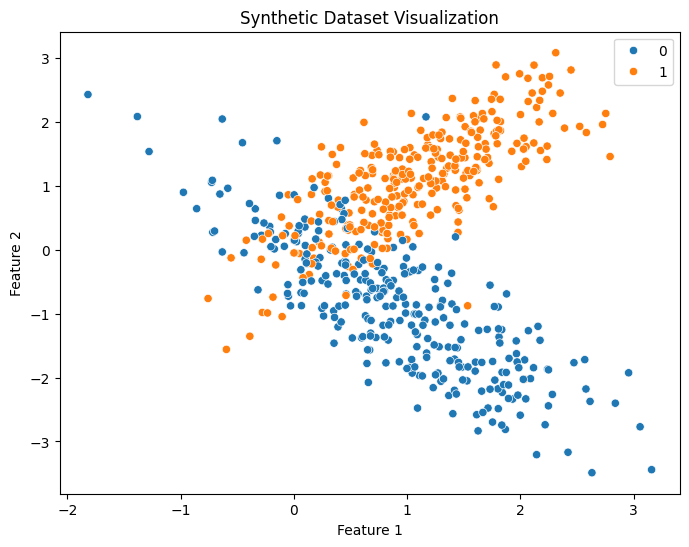

(array([[0.8687836 , 0.8458348 ],
        [0.70852214, 0.71680607],
        [0.63184081, 0.63786494],
        [1.        , 0.00713043],
        [0.57137078, 0.59365177],
        [0.64724682, 0.39166387],
        [0.59314163, 0.5158    ],
        [0.76817506, 0.71198705],
        [0.73929881, 0.71205187],
        [0.7785747 , 0.73713189],
        [0.76954208, 0.09852467],
        [0.75330261, 0.77559518],
        [0.73834859, 0.26750557],
        [0.70124584, 0.2817533 ],
        [0.58787769, 0.62189915],
        [0.68945409, 0.7427068 ],
        [0.75165943, 0.35014697],
        [0.76997243, 0.76733537],
        [0.84727834, 0.0424869 ],
        [0.69099892, 0.37351253],
        [0.75470773, 0.64725479],
        [0.76771441, 0.1365494 ],
        [0.67909218, 0.24814388],
        [0.61985353, 0.69952959],
        [0.58684354, 0.62139883],
        [0.62939279, 0.49171414],
        [0.53438106, 0.42381815],
        [0.71301673, 0.23047867],
        [0.59438389, 0.45252729],
        [0.672

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time

RANDOM_STATE = 254687
N_SAMPLES = 587
N_FEATURES = 2
N_CLASSES = 2

class SyntheticDataset:
    """A class to generate and preprocess synthetic datasets for classification task."""

    def __init__(self, random_state: int, n_samples: int, n_features: int, n_classes: int):
        """
        Initialize the SyntheticDataset class.

        :param random_state: Seed for random number generation.
        :param n_samples: Number of samples to generate.
        :param n_features: Number of features for the dataset.
        :param n_classess: Number of classes for the target variable.
        """
        self.random_state = random_state
        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = n_classes 
        self.X = None
        self.y = None
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None


    def generate_make_classification(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Generate a synthetic dataset using make_classification
        
        :return: A tuple containing the feature matrix (X) and target vector (y)
        """
        self.X, self.y = make_classification(
            n_samples=self.n_samples,
            n_features=self.n_features,
            n_informative=self.n_features,
            n_redundant=0,
            n_clusters_per_class=1, # single-mod means one cluster per class
            random_state=self.random_state
        )
        return self.X, self.y
    
    def generate_make_moons(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Generate a synthetic dataset using make_mmons

        :return: A tuple containing the feature matrix (X) and target vector (y)
        """
        self.X, self.y = make_moons(
            n_samples=self.n_samples,
            random_state=self.random_state,
        )
        return self.X, self.y

    def normalize(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Normalize the feature matrix (X) and target vector(y) to the range [0,1].

        :return: A tuple containing the normalized feature matrix (X) and target vector (y)
 
        Note: 
        Remmber to fit only on training dataset so it means that I use min and max scaler on training dataset and
        then aplly this boudaries for test dataset. 
               """
        if self.X_train is not None and self.X_test is not None:
            min_x, max_x = self.X_train.min(), self.X_train.max() # Min, max taking only from training dataset
            self.X_train = (self.X_train - min_x) / (max_x - min_x)
            self.X_test = (self.X_test - min_x) / (max_x - min_x)

        return self.X_train, self.X_test 


    def visualize(self): 
        """ Visualize the dataset using a scatter plot"""
        if self.X is not None and self.y is not None:
            plt.figure(figsize=(8,6))
            sns.scatterplot(x=self.X[:,0], y=self.X[:,1], hue=self.y)
            plt.title("Synthetic Dataset Visualization")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.show()
        else:
            print("Dataset not generated yet. Call generate() first.")


    
    def splitting(self) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Function for splitting datasets into training and test"""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=RANDOM_STATE)
        return self.X_train, self.X_test, self.y_train, self.y_test

    
dataset = SyntheticDataset(RANDOM_STATE, N_SAMPLES, N_FEATURES, N_CLASSES)
dataset.generate_make_classification() 
dataset.visualize()

# Dividing dataset on a trening set and test set 
dataset.splitting()

# Normalization of datasets 
dataset.normalize()


# 2.0 Implementation of decision tree

In [ ]:
class Node():
    def __init__(self, feature_index: int = None, threshold = None, left: object = None, right: object = None, info_gain: float = None, value: float = None):
        self.featuree_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # For leaf node
        self.value = value

class DecisionTree():

def __init__(self, root, max_depth):
    self.root = root
    self.max_depth = max_depth
    